In [1]:
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.model_selection import GroupShuffleSplit

In [2]:
def calculate_metrics_and_plot(ax, y_true, y_pred, var):
    # Calculate metrics
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    # Density
    xy = np.vstack([y_true, y_pred])
    z = gaussian_kde(xy)(xy)

    scatter = ax.scatter(y_true, y_pred, c=z, s=20, cmap='rainbow')
    
    # Reference line
    ax.plot([1e5, 1e12], [1e5, 1e12], 'r--', lw=2)
    ax.set_xlim(1e5, 1e12)
    ax.set_ylim(1e5, 1e12)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(f'Actual {var}', fontsize=12)
    ax.set_ylabel(f'Predicted {var}', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

    # metrics_text = f'R$^2$: {r2:.2f}'
    metrics_text = f'R$^2$: {r2:.4f}\nMAPE: {mape:.4f}'
    ax.text(0.05, 0.95, metrics_text, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
    
    return scatter

In [ ]:
train = pd.read_csv('/data/keeling/a/xx24/e/proj_ml/code_ml_surfactant_ccn/model/partmc_train.csv')
test  = pd.read_csv('/data/keeling/a/xx24/e/proj_ml/code_ml_surfactant_ccn/model/partmc_test.csv')

In [8]:
input_list = ['Temperature','RH','Bulk_DP','Num_Conc','OA', 'SO4', 'Cl', 'NH4', 'NO3']

output_list = ['CCN_CS_0.1', 'CCN_CS_0.2','CCN_CS_0.4', 'CCN_CS_0.8', 'CCN_CS_1.0']
# output_list = ['CCN_VS_0.1', 'CCN_VS_0.2', 'CCN_VS_0.4', 'CCN_VS_0.8', 'CCN_VS_1.0']

CCN_CS_0.1 - MAPE: 234448216172245.3438, R2: 0.4399
CCN_CS_0.2 - MAPE: 247.6242, R2: 0.7748
CCN_CS_0.4 - MAPE: 4.4198, R2: 0.8961
CCN_CS_0.8 - MAPE: 2.6712, R2: 0.9622
CCN_CS_1.0 - MAPE: 2.2566, R2: 0.9736


/tmp/ipykernel_85001/1923706186.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.88, 1])


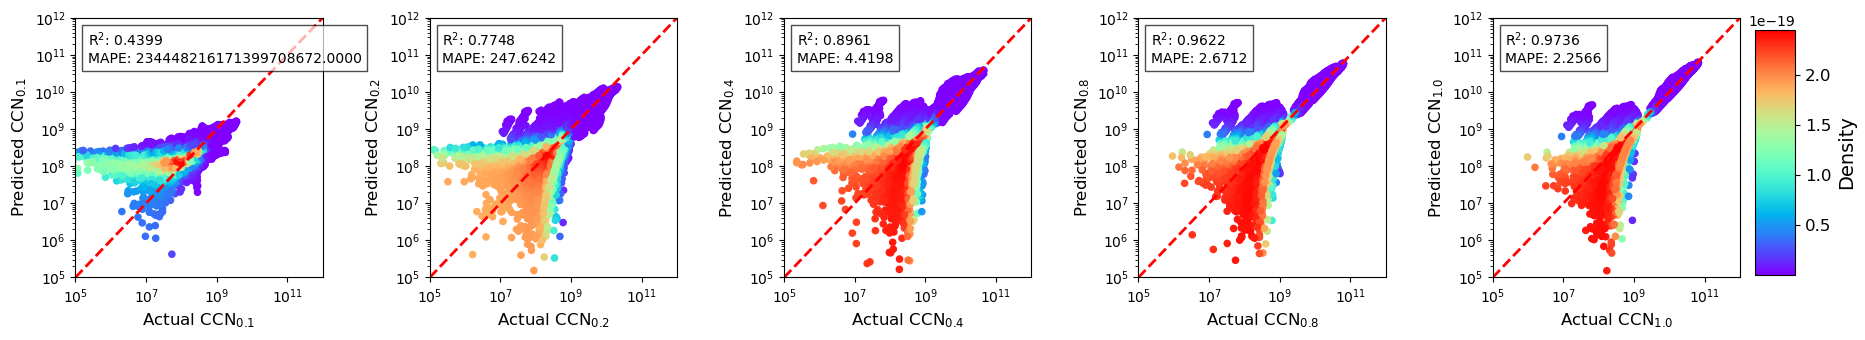

In [9]:
fig, axes = plt.subplots(1, 5, figsize=(20, 3.5))
axes = axes.flatten()

for i, output in enumerate(output_list):
    X_train = train[input_list]
    y_train = train[output]
    X_test = test[input_list]
    y_test = test[output]
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    # 可选：保存训练好的模型
    model_filename = f"/data/keeling/a/xx24/e/proj_ml/code_ml_surfactant_ccn/LinearRegression_emulator_{output}.pkl"
    joblib.dump(lin_reg, model_filename)
    
    # 在测试集上进行预测
    y_test_pred = lin_reg.predict(X_test)
    
    # 计算评价指标
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"{output} - MAPE: {mape:.4f}, R2: {r2:.4f}")
    
    var = f'CCN$_{{{output[7:]}}}$'
    
    # 注意：这里为了与之前的绘图保持一致，将测试标签和预测值乘以 1e6
    scatter = calculate_metrics_and_plot(axes[i], y_test*1e6, y_test_pred*1e6, var)

# 调整图形布局并添加 colorbar
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.88, 0.2, 0.02, 0.7])
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Density', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.show()